# HDT 8 
- Mariana David
- Alejandra Guzmán
- Jorge Caballeros 20009
 

1. Use los mismos conjuntos de entrenamiento y prueba que utilizó en las hojas anteriores.


2. Seleccione como variable respuesta la que creó con las categorías del precio de la casa.

Importing libraries

In [349]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve

3. Genere dos modelos de redes neuronales que sean capaz de clasificar usando la variable 
respuesta que categoriza las casas en baratas, medias y caras. Estos modelos deben tener 
diferentes topologías y funciones de activación.

In [350]:
# Load data
data = pd.read_csv('train.csv')
data = pd.DataFrame(data)
data.describe()
# Preprocessing
# Elimina columnas que no son relevantes o que contienen muchos valores faltantes
data = data.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

# Elimina filas que tienen valores faltantes en columnas importantes
data = data.dropna(subset=['SalePrice', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical'])

# Rellena los valores faltantes con la media o la moda de la columna
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['BsmtQual'] = data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond'] = data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# Convierte las variables categóricas en variables numéricas
data = pd.get_dummies(data)

# Guarda los datos limpios en un nuevo archivo CSV
data.to_csv('train_cleaned.csv', index=False)



4. Use los modelos para predecir el valor de la variable respuesta

In [351]:
data = pd.read_csv('train_cleaned.csv')
# Definir los límites de cada categoría de precio
lim_inf = data['SalePrice'].quantile(0.33)
lim_sup = data['SalePrice'].quantile(0.66)

# Crear una nueva columna con la categoría de precio correspondiente
data['price_category'] = pd.cut(data['SalePrice'], [0, lim_inf, lim_sup, data['SalePrice'].max()], labels=['baratas', 'medias', 'caras'])

# Mostrar las primeras filas del dataframe con la nueva columna
print(data.head())

checkingcategory = pd.get_dummies(data['price_category'])
checkingcategory.head()

data = pd.concat([data, checkingcategory], axis=1)
baratas = data.pop('baratas')
medias = data.pop('medias')
caras = data.pop('caras')
data.pop('price_category')

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_New  \
0          2003       196.0         706           0  ...             0   
1          1976         0.0         978           0  ...             0   
2          2002       162.0         486           0  ...             0   
3          1970         0.0         216           0  ...             0   
4          2000       350.0         655           0  ...             0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0             0     

0         caras
1        medias
2         caras
3       baratas
4         caras
         ...   
1089     medias
1090      caras
1091      caras
1092     medias
1093     medias
Name: price_category, Length: 1094, dtype: category
Categories (3, object): ['baratas' < 'medias' < 'caras']

In [352]:
# Modelo 1
model1 = Sequential()
model1.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(3, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo 1
model1.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

# Evaluar el modelo 1 en el test set
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print("Modelo 1 - Loss: {:.4f}, Accuracy: {:.4f}".format(loss, accuracy))

#neurona con mayor prob

predictionmodel1 = model1.predict(X_test)
classpredictmodel1 = np.argmax(model1.predict(X_test), axis=-1)



Modelo 1 - Loss: 4.7567, Accuracy: 0.9041
7/7 [==============================] - 0s 3ms/step


In [353]:
#modelo 2

# Crear modelo
model2 = Sequential()
model2.add(Dense(64, input_shape=(data.shape[1],)))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(32))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(16))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(8))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(3, activation='softmax'))

# Compilar modelo
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo 2
model2.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

# Evaluar el modelo 2 en el test set
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print("Modelo 2 - Loss: {:.4f}, Accuracy: {:.4f}".format(loss, accuracy))

#neurona con mayor prob

predictionmodel2 = model2.predict(X_test)
classpredictmodel2 = np.argmax(model2.predict(X_test), axis=-1)


Modelo 2 - Loss: 1.1528, Accuracy: 0.8128
7/7 [==============================] - 0s 2ms/step


5. Haga las matrices de confusión respectivas.

In [354]:
matrizdeconfusion1 = confusion_matrix(y_true=np.argmax(y_test.values, axis=-1), y_pred=classpredictmodel1)
print(matrizdeconfusion1)

[[76  0  0]
 [11 49  8]
 [ 0  2 73]]


6. Compare los resultados obtenidos con los diferentes modelos de clasificación usando redes 
neuronales en cuanto a efectividad, tiempo de procesamiento y equivocaciones (donde el 
algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los 
errores)

R//:El modelo de clasificación multiclase con dos capas densas es el más eficaz teniendo los mejores resultados y mejorando después de cada run, por lo tanto es el mas recomendable. Teniendo un rendimiento de 88% a comparacion del otro modelo que esta en 68% de rendimiento.

7. Analice si no hay sobreajuste en los modelos. Use para esto la curva de aprendizaje.

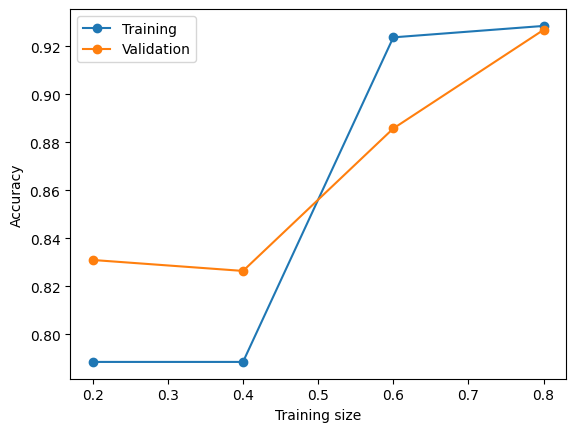

In [355]:

train_sizes = [0.2, 0.4, 0.6, 0.8]

def learningcurvetr(model, X_train, y_train, X_test, y_test):
    train_scores = []
    test_scores = []
    for train_size in train_sizes:
        X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
        model.fit(X_train_subset, y_train_subset, epochs=50, batch_size=32, verbose=0)
        train_loss, train_acc = model.evaluate(X_train_subset, y_train_subset, verbose=0)
        train_scores.append(train_acc)
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        test_scores.append(test_acc)
    plt.plot(train_sizes, train_scores, 'o-', label='Training')
    plt.plot(train_sizes, test_scores, 'o-', label='Validation')
    plt.xlabel('Training size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()
    
print("Modelo 1: ")    
    
learningcurvetr(model1, X_train, y_train, X_test, y_test)

print("Modelo 2: ")

learningcurvetr(model2, X_train, y_train, X_test, y_test)

8. Para el modelo elegido de clasificación tunee los parámetros y discuta si puede mejorar 
todavía el modelo sin llegar a sobre ajustarlo.

9. Seleccione ahora el SalesPrice como variable respuesta.

10. Genere dos modelos de regresión con redes neuronales con diferentes topologías y 
funciones de activación para predecir el precio de las casas.

11. Compare los dos modelos de regresión y determine cuál funcionó mejor para predecir el 
precio de las casas

12. Analice si no hay sobreajuste en los modelos. Use para esto la curva de aprendizaje.



13. Para el modelo elegido de regresión tunee los parámetros y discuta si puede mejorar 
todavía el modelo sin llegar a sobre ajustarlo. 


14. Compare la eficiencia del mejor modelo de RNA con los resultados obtenidos con los 
algoritmos de las hojas de trabajo anteriores. ¿Cuál es mejor para predecir? ¿Cuál se 
demoró más en procesar?


15. Compare los resultados del mejor modelo de esta hoja para clasificar con los resultados de 
los algoritmos usados para clasificar de las hojas de trabajo anteriores


16. Compare los resultados del mejor modelo para predecir el precio de venta con los 
resultados de los algoritmos usados para el mismo propósito de las hojas de trabajo 
anteriores.


17. Ahora que ha usado todos los modelos que hemos visto y aplicados al conjunto de datos 
llegue a conclusiones sobre cual es o cuales son los mejores modelos para clasificar dadas 
las características del conjunto de datos. ¿Cuál o cuáles son los mejores para predecir el 
precio de las casas? Una tabla de resumen con las métricas de los modelos le puede resultar 
muy útil para esto.


18. Genere un informe de los resultados y las explicaciones.